### Some of the relevant Features:

#### Financial Stability:

Annual_Income: Indicates earning capacity and ability to repay loans.

Monthly_Inhand_Salary: Similar to annual income, shows immediate cash flow.

Num_Bank_Accounts: May indicate financial diversification and responsible management.

Num_Credit_Card: High number might suggest potential overspending.

Interest_Rate: Creditworthiness reflected in offered interest rates.

Num_of_Loan: Indicates existing debt burden.

Outstanding_Debt: Total debt amount impacts creditworthiness.

Credit_Utilization_Ratio: High ratio signifies potential overspending.

Payment_of_Min_Amount: Consistent minimum payments indicate responsible behavior.

Total_EMI_per_month: Monthly debt obligations impact repayment ability.

Amount_invested_monthly: Saving habits can indicate financial responsibility.

#### Credit History:

Credit_History_Age: Longer credit history suggests more data for risk assessment.

Delay_from_due_date: Average delay in payments indicates repayment reliability.

Num_of_Delayed_Payment: Frequent delays are negative indicators.

Changed_Credit_Card: Frequent changes might suggest financial instability.

Num_Credit_Inquiries: Excessive inquiries could indicate credit-seeking desperation.

Credit_Mix: Diversified credit mix can be positive for credit score.

### Features to Consider Excluding:

ID: Unique identifier, not relevant for classification.

Customer_ID: Similar to ID, not relevant for classification.

Name: Sensitive information, potentially biased, unlikely to contribute significantly.


In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import sklearn as sk
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder


# Data preprocessing

In [68]:
file = 'train.csv'
data = pd.read_csv(file)
data


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [10]:
for d in data.columns :
    print (f'The type of {d} is :',data[d].dtype)

The type of ID is : int64
The type of Customer_ID is : int64
The type of Month is : int64
The type of Name is : object
The type of Age is : float64
The type of SSN is : float64
The type of Occupation is : object
The type of Annual_Income is : float64
The type of Monthly_Inhand_Salary is : float64
The type of Num_Bank_Accounts is : float64
The type of Num_Credit_Card is : float64
The type of Interest_Rate is : float64
The type of Num_of_Loan is : float64
The type of Type_of_Loan is : object
The type of Delay_from_due_date is : float64
The type of Num_of_Delayed_Payment is : float64
The type of Changed_Credit_Limit is : float64
The type of Num_Credit_Inquiries is : float64
The type of Credit_Mix is : object
The type of Outstanding_Debt is : float64
The type of Credit_Utilization_Ratio is : float64
The type of Credit_History_Age is : float64
The type of Payment_of_Min_Amount is : object
The type of Total_EMI_per_month is : float64
The type of Amount_invested_monthly is : float64
The type 

In [11]:
# number of classes
data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [12]:
missing_values = data.isna().sum()
missing_values

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

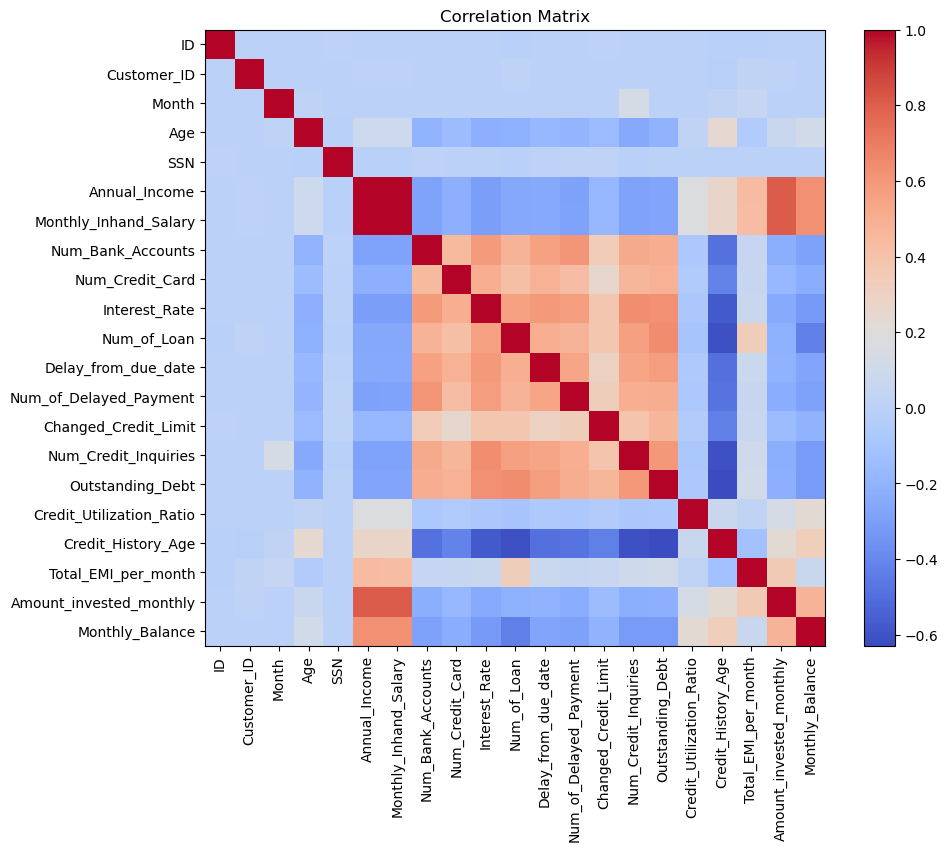

In [69]:
numerical_values = data.select_dtypes(include=['int','float'])
correlation_matrix = numerical_values.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

## Drop unrelavent & redondant features

In [70]:
cols_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'Type_of_Loan' ]  
data.drop(columns=cols_to_drop, inplace=True) 

In [71]:
numerical_values = data.select_dtypes(include=['int','float'])
numerical_values

,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089
1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162
2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863
3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310
4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228
99996,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610
99997,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083
99998,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979


In [72]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Good,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99996,Mechanic,Good,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


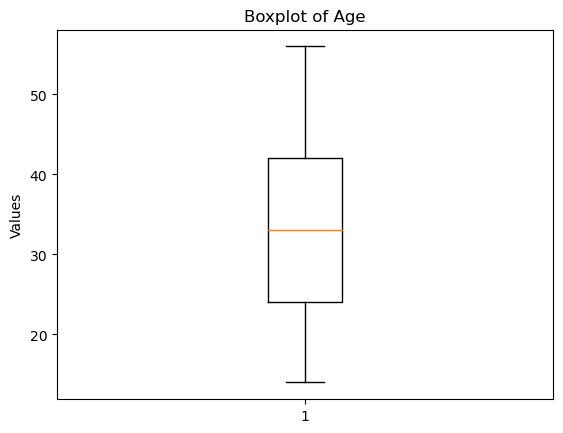

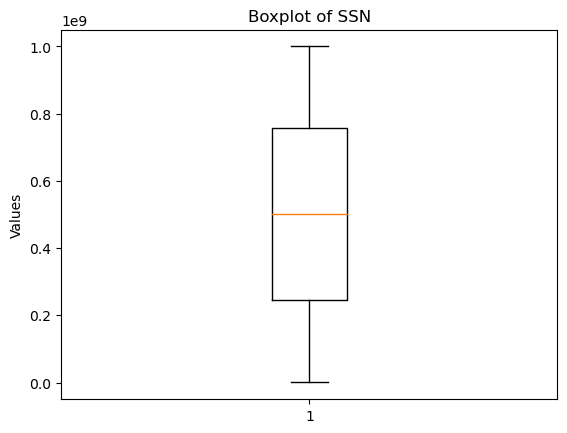

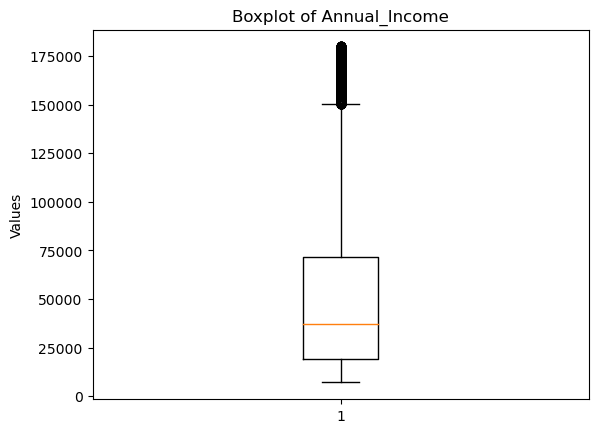

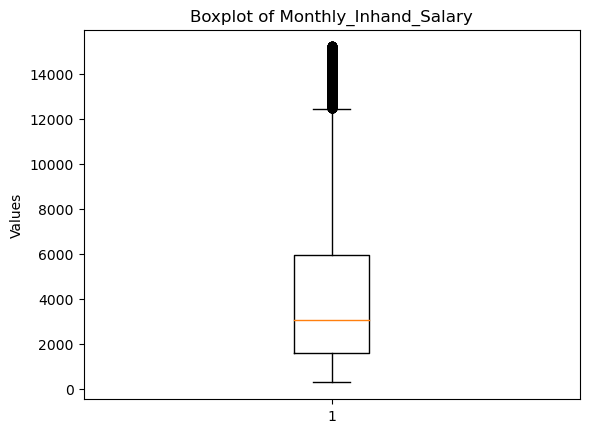

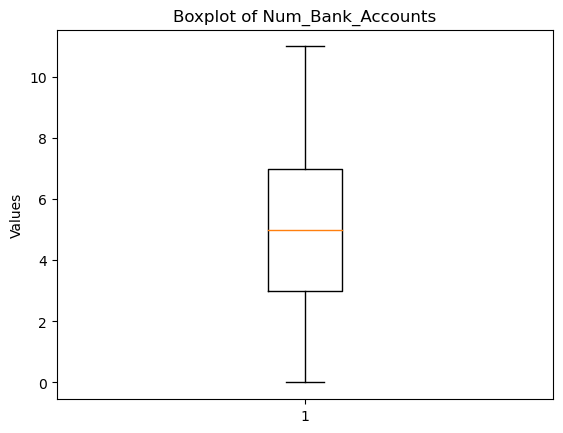

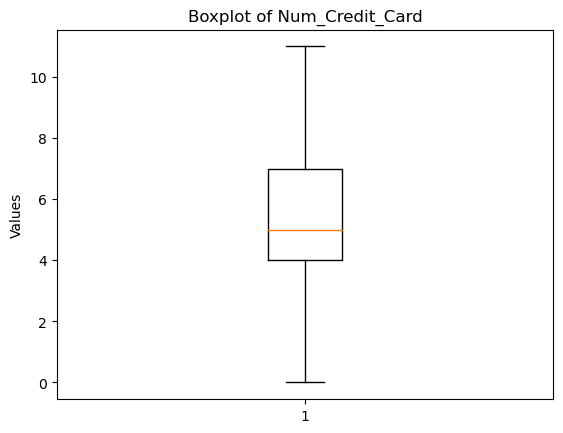

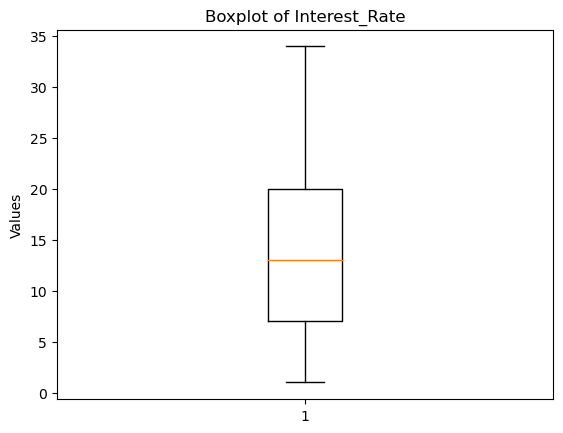

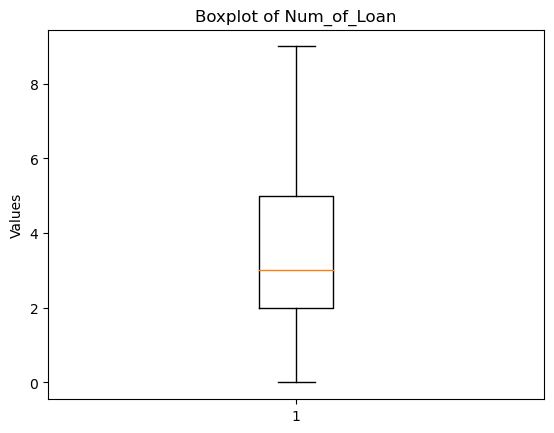

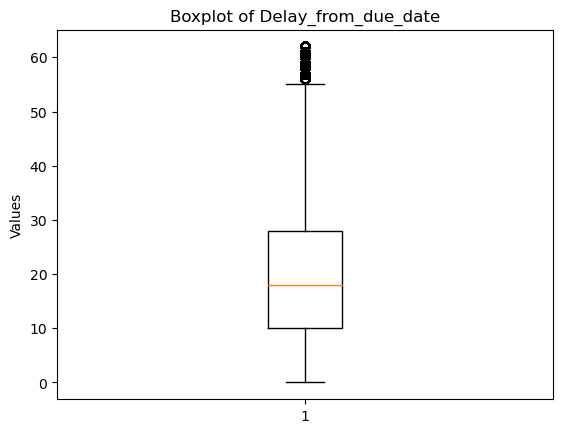

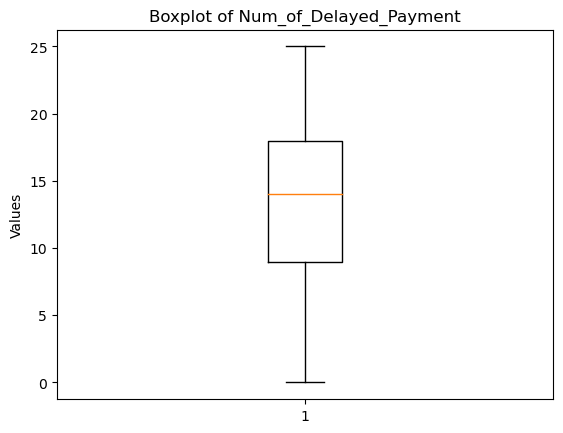

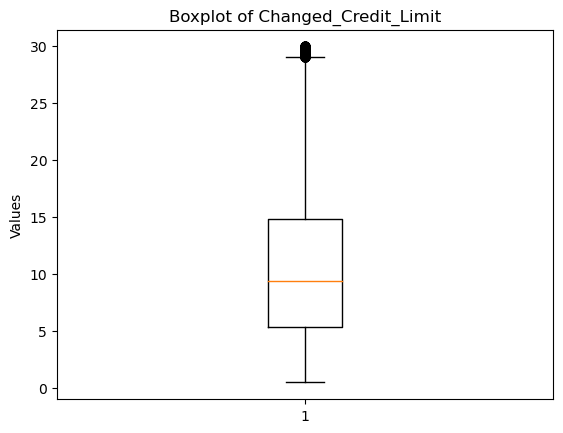

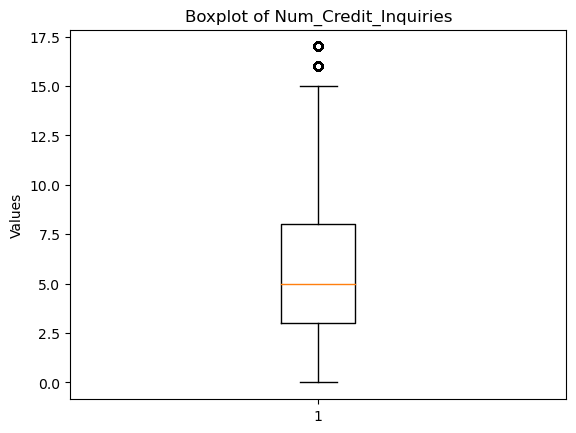

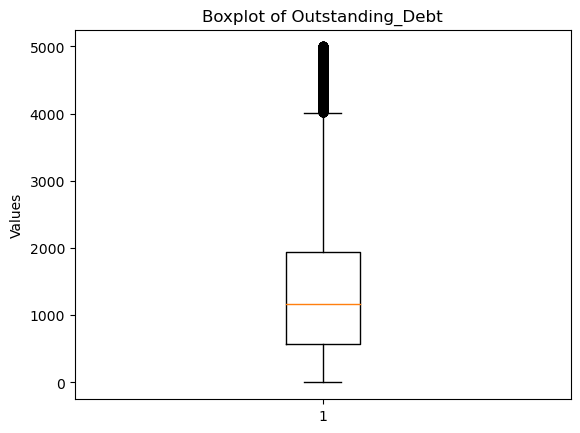

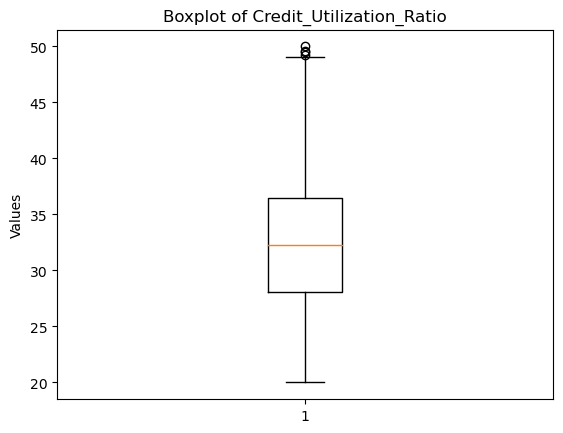

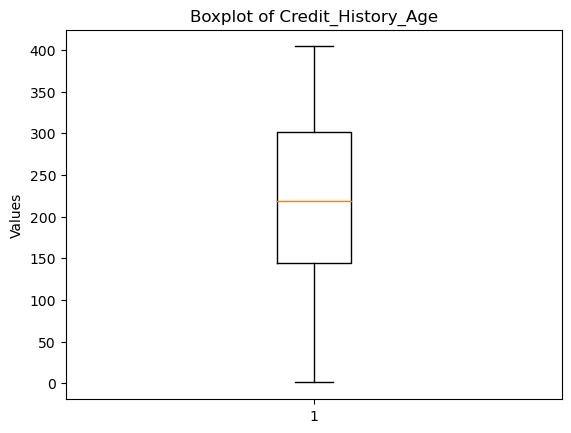

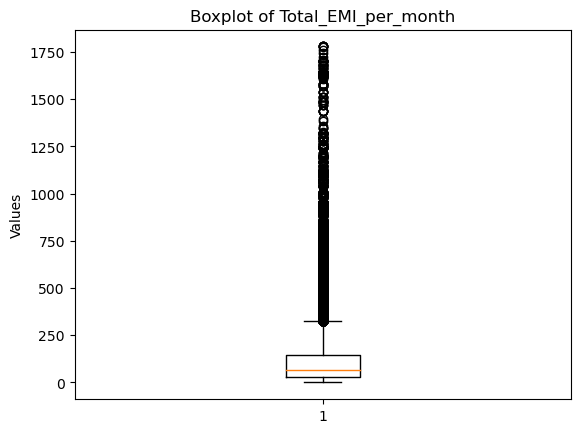

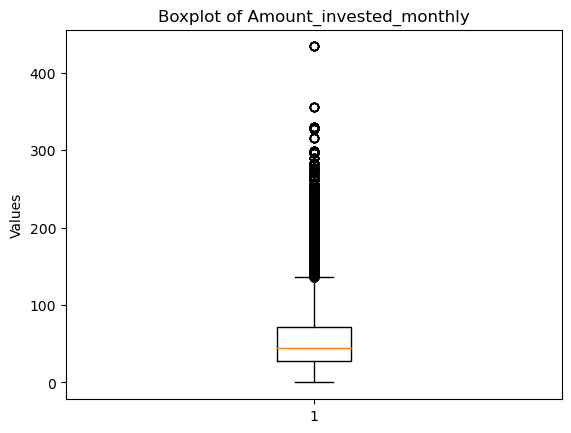

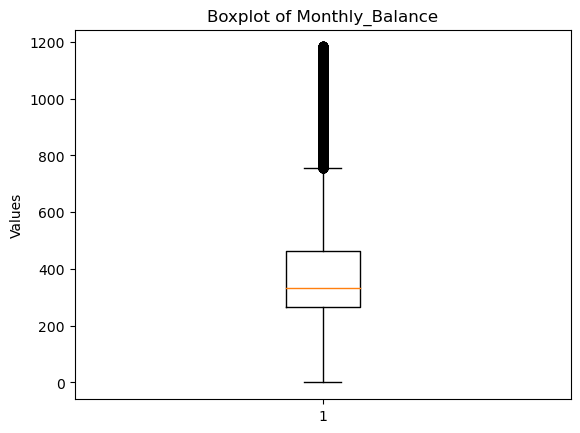

In [73]:
num_columns = numerical_values.columns
# Create a boxplot for each numerical column
for col in num_columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(data[col])
    plt.title('Boxplot of ' + col)
    plt.ylabel('Values')

plt.show()


# Handle outliers of numerical features

In [74]:
# find outliers first & apply smoothing by mean

def replace_outliers_with_mean(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    outliers_mask = (col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)
    col[outliers_mask] = col.mean()
    return col
# numerical columns with outliers are identified from the boxplots above
columns_with_outliers = ['Monthly_Balance','Total_EMI_per_month','Monthly_Inhand_Salary','Amount_invested_monthly','Annual_Income','Outstanding_Debt','Delay_from_due_date']
numerical_values[columns_with_outliers] = numerical_values[columns_with_outliers].apply(replace_outliers_with_mean)


# Categorical features encoding  

In [75]:
categorical_cols = ['Occupation','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# One-hot encode categorical columns
onehotencoder = OneHotEncoder()
transformed_data = onehotencoder.fit_transform(categorical_data[categorical_cols])

# Ordinal encode the 'Credit_Score' column
category_order = [['Poor','Good','Standard']]
ordinal_encoder = OrdinalEncoder(categories=category_order)
encoded_Target_data = ordinal_encoder.fit_transform(categorical_data[['Credit_Score']])

# Convert encoded_Target_data to a DataFrame with proper column names
encoded_Target_data = pd.DataFrame(encoded_Target_data, columns=['Credit_Score'])

# Convert transformed_data to a dense array and then to a DataFrame with proper column names
encoded_data = pd.DataFrame(transformed_data.toarray(), columns=onehotencoder.get_feature_names_out(categorical_cols), index=categorical_data.index)

# Concatenate the original numerical values, encoded data, and encoded target data
concatenated_data = pd.concat([numerical_values, encoded_data, encoded_Target_data], axis=1)
concatenated_data.to_csv('data.csv')

# Apply machine learning classification algorithms



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score, recall_score, f1_score


## Split & Scale data

In [4]:
# split data to 80% training and 20% testing
data = pd.read_csv('data.csv')
X = data.iloc[:, :-1]
# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled , y, test_size=0.2, random_state=123
    )

## SVC

Accuracy: 0.7304
Precision: 0.7054
Recall: 0.7199
f1-score: 0.7104


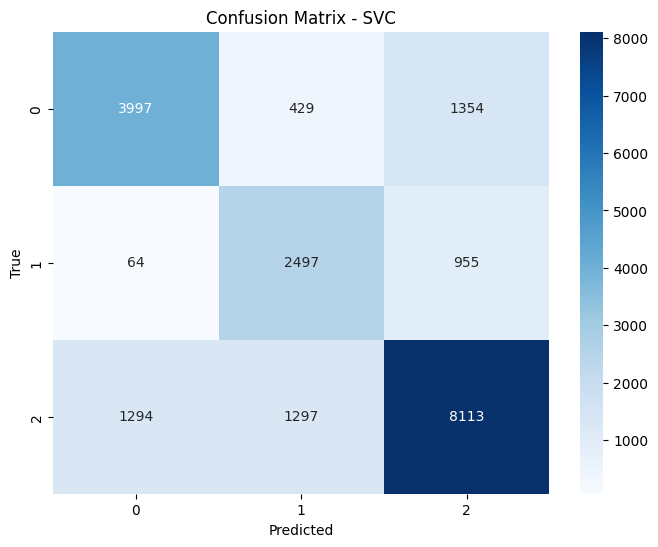

CPU times: user 10min 50s, sys: 1.1 s, total: 10min 51s
Wall time: 10min 54s


In [5]:
%%time
svc_model = SVC(kernel='rbf', C=1.4 ,gamma='auto')
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)
acc = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions,average='macro')
recall= recall_score(y_test,predictions,average='macro')
f1 = f1_score(y_test,predictions,average='macro')
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("f1-score: {:.4f}".format(f1))
# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVC')
plt.show()

## Decision Tree

Accuracy: 0.7621
Precision: 0.7504
Recall: 0.7483
f1-score: 0.7493


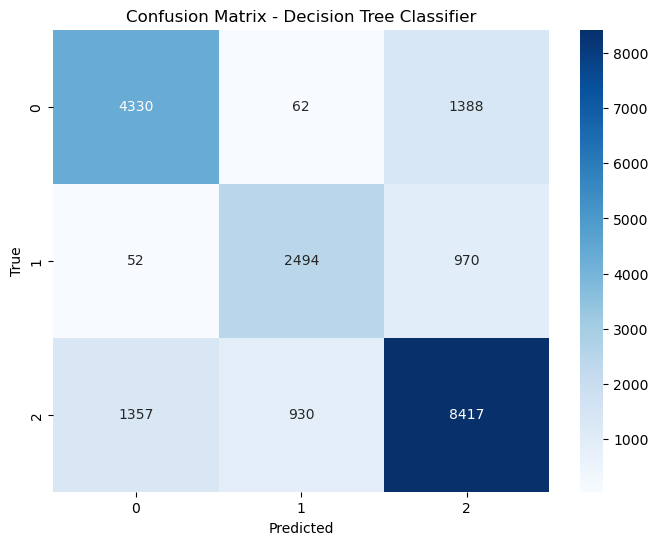

Wall time: 8.25 s


In [78]:
%%time
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
acc = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions,average='macro')
recall= recall_score(y_test,predictions,average='macro')
f1 = f1_score(y_test,predictions,average='macro')
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("f1-score: {:.4f}".format(f1))

# Generate confusion matrix
cm = confusion_matrix(y_test,predictions)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

## Decision Tree With Cost-complexity Pruning

Accuracy: 0.7652
Precision: 0.7546
Recall: 0.7501
f1-score: 0.7523


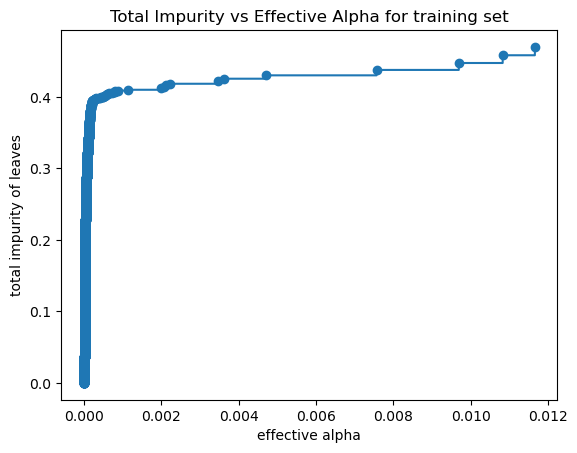

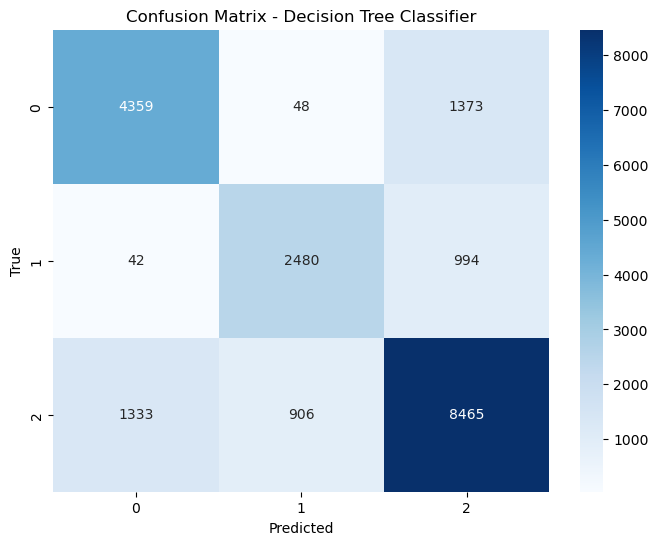

Wall time: 25.6 s


In [79]:
%%time
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
# Compute the cost-complexity pruning path
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]
# Create decision tree classifier with ccp_alpha parameter
DT_pruned = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha)

# Re-fit the tree
DT_pruned.fit(X_train, y_train)
predictions = DT_pruned.predict(X_test)
acc = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions,average='macro')
recall= recall_score(y_test,predictions,average='macro')
f1 = f1_score(y_test,predictions,average='macro')
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("f1-score: {:.4f}".format(f1))

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

## Random forest

Accuracy: 0.8242
Precision: 0.8131
Recall: 0.8210
f1-score: 0.8165


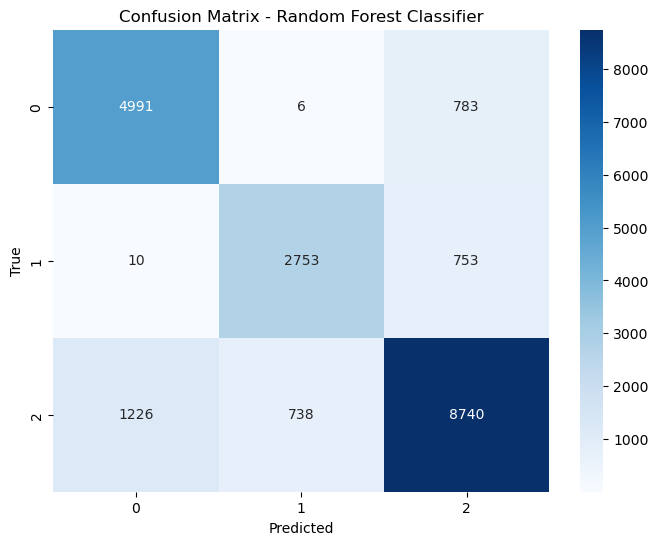

Wall time: 1min 24s


In [5]:
%%time
# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=150)
rf_classifier.fit(X_train , y_train)
predictions = rf_classifier.predict(X_test)
acc = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions,average='macro')
recall= recall_score(y_test,predictions,average='macro')
f1 = f1_score(y_test,predictions,average='macro')
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("f1-score: {:.4f}".format(f1))
# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

## Gradient Boosting

Accuracy: 0.8453
Precision: 0.8362
Recall: 0.8436
f1-score: 0.8396


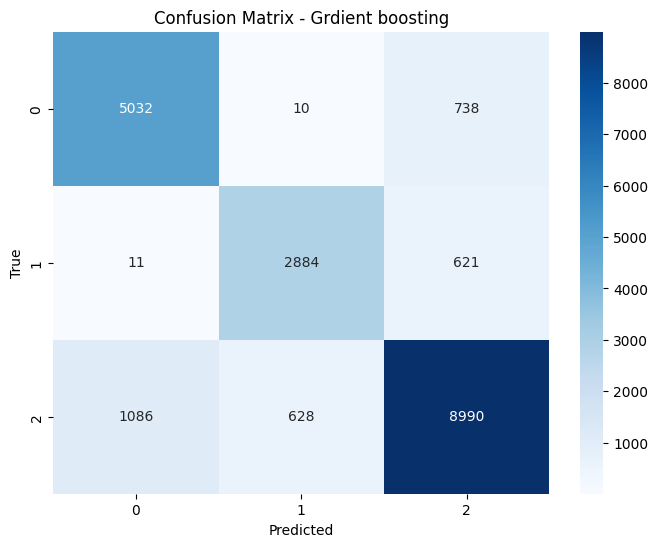

CPU times: user 16min 3s, sys: 1.39 s, total: 16min 4s
Wall time: 16min 6s


In [6]:
%%time
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=42)
# Train the classifier
gb_classifier.fit(X_train, y_train)
# Make predictions on the test set
predictions = gb_classifier.predict(X_test)
# Calculate accuracy
acc = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions,average='macro')
recall= recall_score(y_test,predictions,average='macro')
f1 = f1_score(y_test,predictions,average='macro')
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("f1-score: {:.4f}".format(f1))
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Grdient boosting')
plt.show()